In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns

In [2]:
path11 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'
path12 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path21 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 NobelpapercontrolsCD.zip'
path22 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 Nobelpapercontrols.zip'

In [3]:
fNobel1 = pd.read_csv(path11)
fControl1 = pd.read_csv(path21)
fNobel2 = pd.read_csv(path12)
fControl2 = pd.read_csv(path22)

In [4]:
fNobel = pd.concat([fNobel1 , fNobel2] , axis = 1)
fControl = pd.concat([fControl1 , fControl2] , axis = 1)

fNobel = fNobel.loc[:, ~fNobel.columns.duplicated()]
fControl = fControl.loc[:, ~fControl.columns.duplicated()]

In [6]:
fNobel['type']='Nobel-winning papers'
fControl['type']='Control group papers'

In [7]:
column = ['paperyear', 'ref', 'cit','title', 'journal','CD','ni','type']

In [8]:
fN1 = fNobel[fNobel['Field'] == 'Physics'][column]
fN2 = fNobel[fNobel['Field'] == 'Chemistry'][column]
fN3 = fNobel[fNobel['Field'] == 'Medicine'][column]

In [9]:
fC1 = fControl[fControl['Field'] == 'Physics'][column]
fC2 = fControl[fControl['Field'] == 'Chemistry'][column]
fC3 = fControl[fControl['Field'] == 'Medicine'][column]

In [10]:
f1 = pd.concat([fN1,fC1])
f2 = pd.concat([fN2,fC2])
f3 = pd.concat([fN3,fC3])

In [17]:
f1.sort_values('ni',ascending=False).head(7)[['title','paperyear', 'journal', 'ref', 'cit','ni','CD','type']].to_excel('E:/1.xlsx')
f2.sort_values('ni',ascending=False).head(7)[['title','paperyear', 'journal', 'ref', 'cit','ni','CD','type']].to_excel('E:/2.xlsx')
f3.sort_values('ni',ascending=False).head(7)[['title','paperyear', 'journal', 'ref', 'cit','ni','CD','type']].to_excel('E:/3.xlsx')

In [20]:
f1[f1['cit']>100].sort_values(['CD'],ascending=False).head(7)[['title','paperyear', 'journal', 'ref', 'cit','ni','CD','type']].to_excel('E:/1.xlsx')
f2[f2['cit']>100].sort_values(['CD'],ascending=False).head(7)[['title','paperyear', 'journal', 'ref', 'cit','ni','CD','type']].to_excel('E:/2.xlsx')
f3[f3['cit']>100].sort_values(['CD'],ascending=False).head(7)[['title','paperyear', 'journal', 'ref', 'cit','ni','CD','type']].to_excel('E:/3.xlsx')

# match

In [20]:
MAGjif = pd.read_csv(r"E:\netData\MAG\jif.zip" , sep = "\t")

In [21]:
def getname(x):
    if type(x)==str:
        if r":" in x:
            x = x.split(":")[0].strip()
        if "-" in x:
            x = x.split("-")[0].strip()
        return x
    else:
        return 'not in journal'

# Journal

In [52]:
d = pd.DataFrame(Counter(fN1['journal']).most_common(10))
jif = []
for j in d[0].values:
    jif.append( -10 * np.log10(MAGjif[MAGjif['journalname'] == j]['jif'].max()))

y_pos = range(1,11)
Jname = [getname(i) for i in d[0].values]

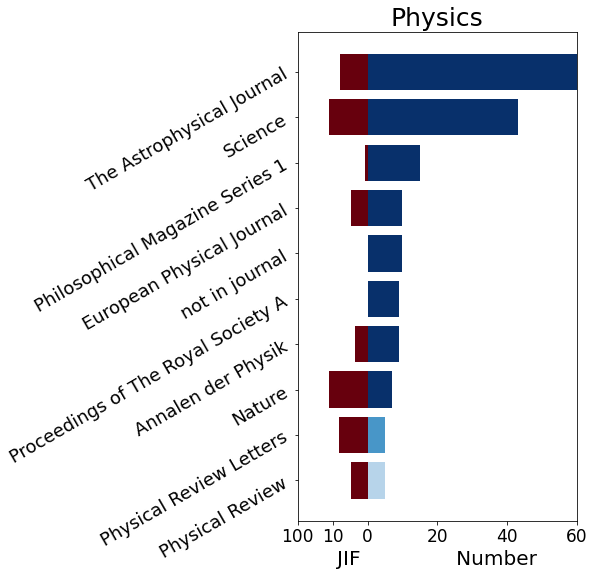

In [53]:
f, ax = plt.subplots(figsize=(5, 9))
x = d[1].values
plt.barh(y_pos , x[::-1] ,align='center',color=plt.cm.Blues(1.3 - x / np.max(x)),alpha=1 )
plt.barh(y_pos , jif,align='center',color=plt.cm.Reds(1.2),alpha=1 )
plt.xlim(-20,60)
plt.xticks([-20,-10,0,20,40,60] ,[100,10,0,20,40,60], size = 17)
plt.yticks(y_pos ,Jname ,size = 18)
plt.xlabel('JIF'+' '*15+'Number',fontsize = 20)
ax.tick_params(axis='y', which='major', labelrotation=30)
plt.title("Physics",fontsize = 25)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B1\a1.pdf",bbox_inches = 'tight')

In [22]:
d = pd.DataFrame(Counter(fC1['journal']).most_common(10))
jif = []
for j in d[0].values:
    jif.append( -200 * np.log10(MAGjif[MAGjif['journalname'] == j]['jif'].max()))

y_pos = range(1,11)
Jname = [getname(i) for i in d[0].values]

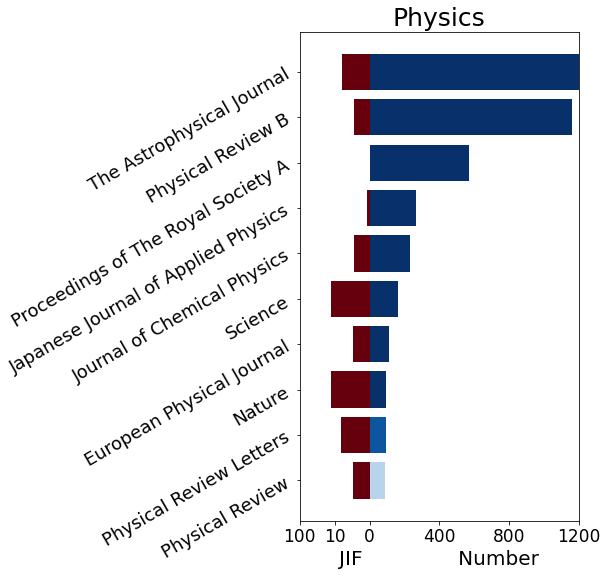

In [23]:
f, ax = plt.subplots(figsize=(5, 9))
x = d[1].values
plt.barh(y_pos , x[::-1] ,align='center',color=plt.cm.Blues(1.3 - x / np.max(x)),alpha=1 )
plt.barh(y_pos , jif,align='center',color=plt.cm.Reds(1.2),alpha=1 )
plt.xlim(-400,1200)
plt.xticks([-400,-200,0,400,800,1200] ,[100,10,0,400,800,1200], size = 17)
plt.yticks(y_pos ,Jname ,size = 18)
plt.xlabel('JIF'+' '*15+'Number',fontsize = 20)
ax.tick_params(axis='y', which='major', labelrotation=30)
plt.title("Physics",fontsize = 25)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B1\b1.pdf",bbox_inches = 'tight')

In [89]:
d = pd.DataFrame(Counter(fN2['journal']).most_common(10))
jif = []
for j in d[0].values:
    jif.append( -10 * np.log10(MAGjif[MAGjif['journalname'] == j]['jif'].max()))

y_pos = range(1,11)
Jname = [getname(i) for i in d[0].values]

In [90]:
Jname = ['PNAS' if i =='Proceedings of the National Academy of Sciences of the United States of America' else i for i in Jname]

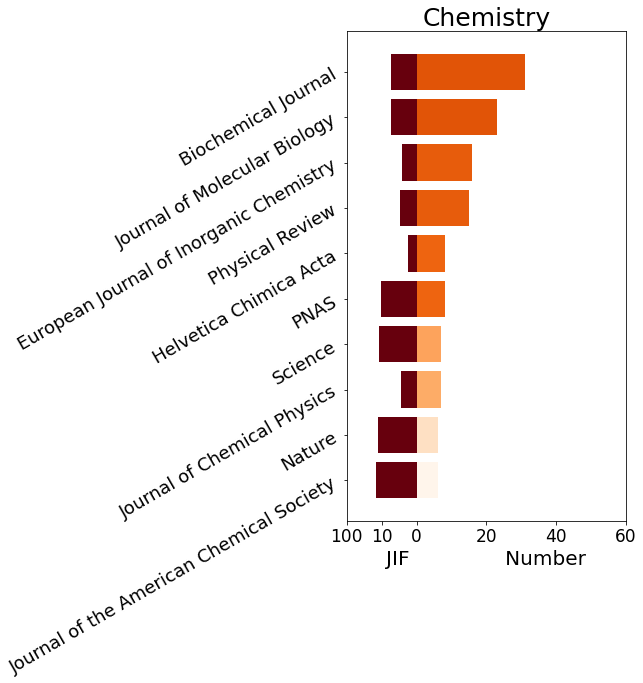

In [91]:
f, ax = plt.subplots(figsize=(5, 9))
x = d[1].values
plt.barh(y_pos , x[::-1] ,align='center',color=plt.cm.Oranges(.9 - x / np.max(x)),alpha=1 )
plt.barh(y_pos , jif,align='center',color=plt.cm.Reds(1.2),alpha=1 )
plt.xlim(-20,60)
plt.xticks([-20,-10,0,20,40,60] ,[100,10,0,20,40,60], size = 17)
plt.yticks(y_pos ,Jname ,size = 18)
plt.xlabel('JIF'+' '*15+'Number',fontsize = 20)
ax.tick_params(axis='y', which='major', labelrotation=30)
plt.title("Chemistry",fontsize = 25)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B1\a2.pdf",bbox_inches = 'tight')

In [24]:
d = pd.DataFrame(Counter(fC2['journal']).most_common(10))
jif = []
for j in d[0].values:
    jif.append( -200 * np.log10(MAGjif[MAGjif['journalname'] == j]['jif'].max()))

y_pos = range(1,11)
Jname = [getname(i) for i in d[0].values]

In [25]:
Jname = ['PNAS' if i =='Proceedings of the National Academy of Sciences of the United States of America' else i for i in Jname]

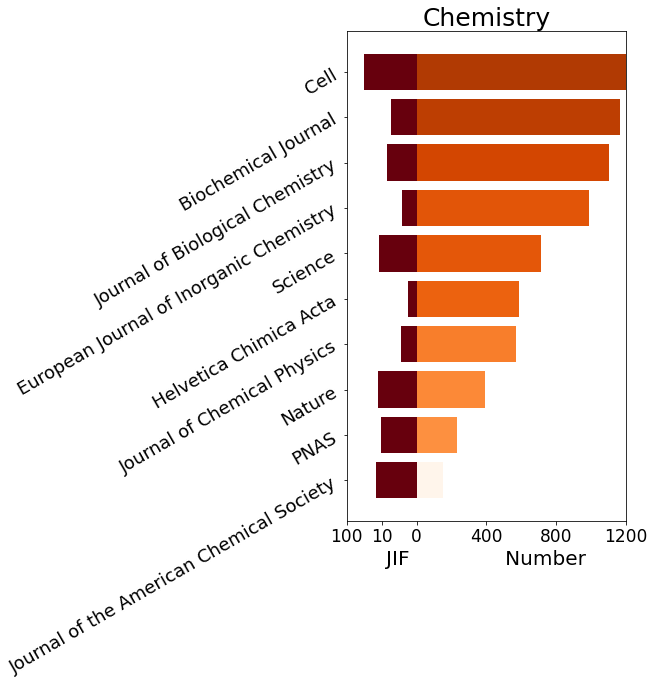

In [26]:
f, ax = plt.subplots(figsize=(5, 9))
x = d[1].values
plt.barh(y_pos , x[::-1] ,align='center',color=plt.cm.Oranges(.9 - x / np.max(x)),alpha=1 )
plt.barh(y_pos , jif,align='center',color=plt.cm.Reds(1.2),alpha=1 )
plt.xlim(-400,1200)
plt.xticks([-400,-200,0,400,800,1200] ,[100,10,0,400,800,1200], size = 17)
plt.yticks(y_pos ,Jname ,size = 18)
plt.xlabel('JIF'+' '*15+'Number',fontsize = 20)
ax.tick_params(axis='y', which='major', labelrotation=30)
plt.title("Chemistry",fontsize = 25)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B1\b2.pdf",bbox_inches = 'tight')

In [83]:
d = pd.DataFrame(Counter(fN3['journal']).most_common(10))
jif = []
for j in d[0].values:
    jif.append( -10 * np.log10(MAGjif[MAGjif['journalname'] == j]['jif'].max()))

y_pos = range(1,11)
Jname = [getname(i) for i in d[0].values]

In [84]:
Jname = ['PNAS' if i =='Proceedings of the National Academy of Sciences of the United States of America' else i for i in Jname]

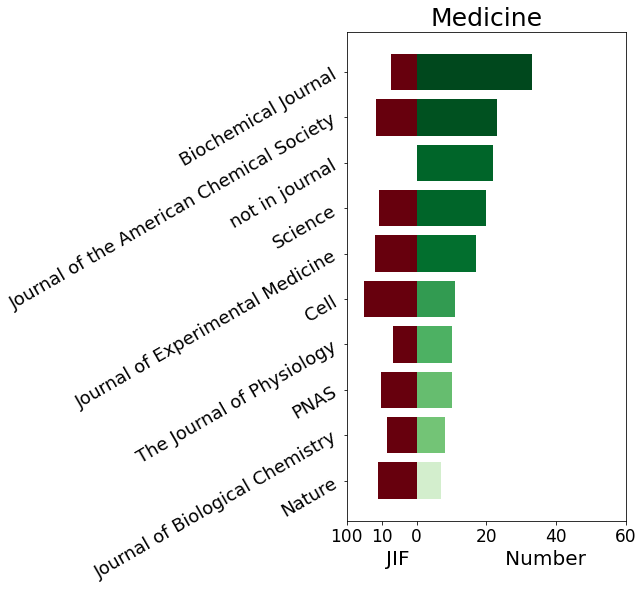

In [85]:
f, ax = plt.subplots(figsize=(5, 9))
x = d[1].values
plt.barh(y_pos , x[::-1] ,align='center',color=plt.cm.Greens(1.2 - x / np.max(x)),alpha=1 )
plt.barh(y_pos , jif,align='center',color=plt.cm.Reds(1.2),alpha=1 )
plt.xlim(-20,60)
plt.xticks([-20,-10,0,20,40,60] ,[100,10,0,20,40,60], size = 17)
plt.yticks(y_pos ,Jname ,size = 18)
plt.xlabel('JIF'+' '*15+'Number',fontsize = 20)
ax.tick_params(axis='y', which='major', labelrotation=30)
plt.title("Medicine",fontsize = 25)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B1\a3.pdf",bbox_inches = 'tight')

In [27]:
d = pd.DataFrame(Counter(fC3['journal']).most_common(10))
jif = []
for j in d[0].values:
    jif.append( -200 * np.log10(MAGjif[MAGjif['journalname'] == j]['jif'].max()))

y_pos = range(1,11)
Jname = [getname(i) for i in d[0].values]

In [28]:
Jname = ['PNAS' if i =='Proceedings of the National Academy of Sciences of the United States of America' else i for i in Jname]

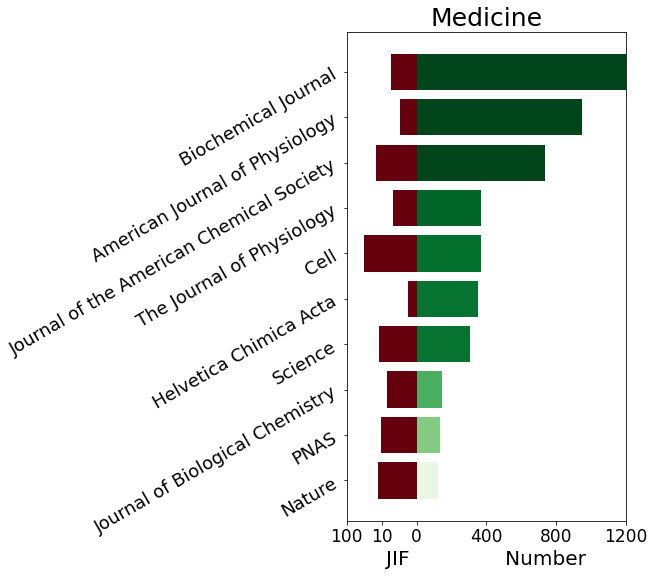

In [29]:
f, ax = plt.subplots(figsize=(5, 9))
x = d[1].values
plt.barh(y_pos , x[::-1] ,align='center',color=plt.cm.Greens(1.1 - x / np.max(x)),alpha=1 )
plt.barh(y_pos , jif,align='center',color=plt.cm.Reds(1.2),alpha=1 )
plt.xlim(-400,1200)
plt.xticks([-400,-200,0,400,800,1200] ,[100,10,0,400,800,1200], size = 17)
plt.yticks(y_pos ,Jname ,size = 18)
plt.xlabel('JIF'+' '*15+'Number',fontsize = 20)
ax.tick_params(axis='y', which='major', labelrotation=30)
plt.title("Medicine",fontsize = 25)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B1\b3.pdf",bbox_inches = 'tight')